# Parte Uno

In [2]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import scipy 
import numpy as np
import random as rd
import nltk
import sklearn
from sklearn.neighbors import NearestNeighbors
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
from tqdm import tqdm

%matplotlib inline
nltk.download('stopwords')

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\igna-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Ejercicio 4

In [22]:
contents = pd.read_csv('contents.csv')

In [3]:
noComenta = contents.loc[contents['revisor_comment'].isna(),: ]

In [4]:
noComenta.loc[noComenta['revisor_id'].notna(),:].count()[0] / contents.count()[0]

0.09490169790133973

La probabilidad de que un revisor no comente y este logueado es de 9,4901697% aproximadamente.

In [5]:
noComenta.loc[noComenta['revisor_id'].isna(),:].count()[0] / contents.count()[0]

0.0186524723147216

La probabilidad de que un revisor no este logueado y no comente es de 1,865247% aproximadamente.

## Ejercicio 5

In [6]:
serieTitulos = contents.loc[:,'title']

In [7]:
serieTitulos = serieTitulos.astype(str)

In [8]:
titulos = serieTitulos.str.lower().str.split(' ')      

In [9]:
palabras = []
for line in titulos:
    for word in line:
        palabras.append(word)

In [10]:
stopwords = set(nltk.corpus.stopwords.words('spanish') + nltk.corpus.stopwords.words('english'))
palabras_sin_stopwords = [word for word in palabras if word not in stopwords]

In [11]:
Counter(palabras_sin_stopwords).most_common(20)

[('san', 43930),
 ('juegos', 30602),
 ('municipio', 28788),
 ('josé', 26438),
 ('nacional', 25014),
 ('fútbol', 24042),
 ('siglo', 22937),
 ('juan', 22828),
 ('españa', 21012),
 ('olímpicos', 20388),
 ('club', 20302),
 ('(condado', 19024),
 ('santa', 18453),
 ('maría', 18379),
 ('campeonato', 17295),
 ('copa', 16741),
 ('jose', 16406),
 ('(desambiguación)', 16230),
 ('distrito', 16076),
 ('iglesia', 15264)]

La palabra no stopword del espaniol ni el ingles con mas incidencia es 'san'.

## Ejercicio 7

In [12]:
titulosApellido = contents.where(lambda x : x['title'].str.contains('argel'))

In [13]:
titulosApellido = titulosApellido.loc[titulosApellido['title'].notna(),:]

In [20]:
titulosApellido['revision_timestamp'] = pd.to_datetime(titulosApellido['revision_timestamp'])

In [21]:
fecha = (pd.to_datetime(titulosApellido['revision_timestamp'])).mean()
fecha = fecha.date()
delta = (date.today() - fecha)
delta

datetime.timedelta(days=1896)

La antiguedad promedio de las ediciones de items con mi apellido contenido en el titulo es de 1896 dias al dia de hoy.

## Ejercicio 10

In [16]:
contents = pd.read_csv('contents.csv')

In [17]:
conRevisionesAnteriores = contents.where(lambda x : x['parent_revision'].notna())

In [18]:
conRevisionesAnteriores = conRevisionesAnteriores.loc[conRevisionesAnteriores['parent_revision'].notna()]

In [19]:
conRevisionesAnteriores['revision_id'] = conRevisionesAnteriores['revision_id']
conRevisionesAnteriores['parent_revision'] = conRevisionesAnteriores['parent_revision']

In [22]:
conRevisionesAnteriores['distancia_entre_ids'] =  abs(conRevisionesAnteriores['revision_id'] - conRevisionesAnteriores['parent_revision'])

In [23]:
mayorDist = conRevisionesAnteriores.nlargest(1,'distancia_entre_ids')
menorDist = conRevisionesAnteriores.nsmallest(1,'distancia_entre_ids')

In [24]:
mayorDist.title

16172    CEDA
Name: title, dtype: object

In [25]:
mayorDist.distancia_entre_ids

16172         137,146,746.00
Name: distancia_entre_ids, dtype: float64

In [26]:
menorDist.title

6    Artes visuales
Name: title, dtype: object

In [27]:
menorDist.distancia_entre_ids

6                   1.00
Name: distancia_entre_ids, dtype: float64

El articulo con mayor distancia entre ids es 'CEDA' con un valor de 137146746 y el de menor distancia es 'Artes visuales' con un valor de 1.

## Ejercicio 17

In [28]:
textos = pd.read_csv('contents_text_sample.csv')

In [29]:
textos_sinna = textos.loc[textos['text'].notna()]

In [30]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase = True, stop_words= stopwords)

In [31]:
serieTextos = textos_sinna['text']

In [32]:
matriz = vectorizer.fit_transform(serieTextos)

In [33]:
query = vectorizer.transform(['retablo iglesia'])

In [34]:
buscador = sklearn.neighbors.NearestNeighbors(algorithm = 'brute', metric = 'cosine')
buscador.fit(matriz)

NearestNeighbors(algorithm='brute', metric='cosine')

In [35]:
dist, index = buscador.kneighbors(query, n_neighbors = 1)

In [36]:
dist

array([[0.18760551]])

In [37]:
textos.iloc[index[0][0],:]

id                         223146
title               Pala de altar
text     #REDIRECCIÓN [[Retablo]]
Name: 5074, dtype: object

Alguna página acerca del retablo de alguna iglesia podria ser la que se muestra arriba, titulada 'Pala de altar'.
Al buscarla en wikipedia, literalmente me abrio Retablo y habla sobre eso.

## Ejercicio 50

In [3]:
logs = pd.read_csv('logs.csv')

In [4]:
lang = pd.read_csv('languages.csv')

In [5]:
lang['babel_level'] = lang['babel_level'].replace('N',6)
lang['babel_level'] = lang['babel_level'].astype(int)
lang_aprobados = lang.loc[lang['babel_level'] >= 1,:]

In [6]:
cantidad_por_user = lang_aprobados['babel_user'].value_counts()
cantidad_por_user = cantidad_por_user.to_frame()

In [7]:
cantidad_por_user = cantidad_por_user.reset_index().rename(columns={'index': 'contributor_id','babel_user': 'cantidad_idiomas'})
cantidad_por_user

,contributor_id,cantidad_idiomas
0,5928200,44
1,90823,34
2,1337465,34
3,3276151,29
4,4075698,28
...,...,...
10804,2171030,1
10805,682198,1
10806,2888924,1
10807,164141,1


In [8]:
logs= logs.loc[logs['contributor_id'].notna(),:]
logs['contributor_id'] = logs['contributor_id'].astype(int)

In [9]:
logs_totales=logs['logtype'].value_counts().sum()

In [10]:
log_cols = logs['logtype'].dropna()

In [11]:
cantidad_por_user['contributor_id'] = cantidad_por_user['contributor_id'].astype(int)

In [12]:
df50 = logs.merge(cantidad_por_user, on = 'contributor_id',how = 'inner')
df50

,item_id,timestamp,contributor_username,contributor_id,contributor_ip,comment,logtype,action,title,cantidad_idiomas
0,1,2004-12-23T07:10:09Z,Sabbut,2075,NaN,el contenido era: 'Si aprendés Pensamiento Cie...,delete,delete,Verificacionismo,4
1,2,2004-12-23T07:14:09Z,Sabbut,2075,NaN,el contenido era: '{{destruir}}en algun lugar ...,delete,delete,Rapunzel,4
2,3,2004-12-23T07:26:10Z,Sabbut,2075,NaN,el contenido era: '#REDIRECT [[Flash]]',delete,delete,Macromedia Flash,4
3,95,2004-12-24T09:51:09Z,Sabbut,2075,NaN,el contenido era: '{{destruir}}yo soy el hombr...,delete,delete,Ritmo,4
4,107,2004-12-24T15:27:00Z,Sabbut,2075,NaN,"redundante, y todas las empresas ya están cate...",delete,delete,Empresas actuales de Informática,4
...,...,...,...,...,...,...,...,...,...,...
1727941,15578412,2021-08-30T10:27:07Z,LisaTaridis7,6331490,NaN,Página creada con «{{#babel:en|es-2|pt-5}}»,create,create,Usuario:LisaTaridis7,3
1727942,15580987,2021-08-31T12:03:31Z,Wikimacu,6332447,NaN,NaN,newusers,create,Usuario:Wikimacu,2
1727943,15583036,2021-09-01T07:50:55Z,Wikimacu,6332447,NaN,Página nueva.,create,create,Usuario:Wikimacu/Taller,2
1727944,15583459,2021-09-01T14:20:33Z,Wikimacu,6332447,NaN,Artículo creado con el [[WP:ACA|#Asistentedear...,create,create,Asociación Pompaelo,2


In [13]:
arr_index = cantidad_por_user.cantidad_idiomas.astype('category').values
arr_index

[44, 34, 34, 29, 28, ..., 1, 1, 1, 1, 1]
Length: 10809
Categories (28, int64): [1, 2, 3, 4, ..., 28, 29, 34, 44]

In [14]:
por_type = (df50.groupby(by = 'logtype').cantidad_idiomas.value_counts()).to_frame().rename(columns = {'cantidad_idiomas':'cantidad_items'})
dfFinal_final = por_type.pivot_table(index = 'cantidad_idiomas', columns = 'logtype', values = 'cantidad_items').replace(np.nan,0)

In [15]:
total_logs=dfFinal_final.sum().sum()

A continuacion se presenta el dataframe pedido:

In [16]:
dfFinal_final_final =dfFinal_final/total_logs
dfFinal_final_final

logtype,block,campus,contentmodel,course,create,delete,eparticle,gblrights,import,institution,...,newusers,online,patrol,protect,renameuser,rights,student,tag,thanks,upload
cantidad_idiomas,,,,,,,,,,,,,,,,,,,,,
1,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.01,0.00,0.00,0.00,0.07,0.11,0.00,0.00,0.00,0.00,...,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.01,0.00
3,0.02,0.00,0.00,0.00,0.03,0.12,0.00,0.00,0.00,0.00,...,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.00
4,0.02,0.00,0.00,0.00,0.03,0.17,0.00,0.00,0.00,0.00,...,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.01,0.00
5,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,...,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [17]:
dfFinal_final_final.sum().sum()

1.0000000000000002

## Ejercicio 57

In [18]:
acciones = logs
acciones['timestamp'] = pd.to_datetime(logs['timestamp'])

In [19]:
acciones.timestamp = acciones.timestamp.dt.weekday

In [20]:
prob_acc_gen_por_dia = acciones.timestamp.value_counts()/acciones.count()[0]

In [23]:
ult_edi = contents
ult_edi['revision_timestamp'] = pd.to_datetime(contents['revision_timestamp'])

In [24]:
ult_edi.revision_timestamp = ult_edi.revision_timestamp.dt.weekday

In [25]:
prob_ult_edi_por_dia = ult_edi.revision_timestamp.value_counts()/ult_edi.count()[0]

In [26]:
prob_ult_edi_por_dia = prob_ult_edi_por_dia.sort_index()
prob_ult_edi_por_dia

0                   0.15
1                   0.15
2                   0.15
3                   0.15
4                   0.13
5                   0.13
6                   0.13
Name: revision_timestamp, dtype: float64

Probabilidades de que la ultima edicion se realice segun el dia:


Dia | Probabilidad
-------- | -------
Lunes | 0.15 
Martes | 0.15 
Miercoles | 0.15
Jueves | 0.15 
Viernes | 0.13 
Sabado | 0.13 
Domingo | 0.13



In [27]:
prob_acc_gen_por_dia = prob_acc_gen_por_dia.sort_index()
prob_acc_gen_por_dia                                      

0                   0.14
1                   0.15
2                   0.15
3                   0.14
4                   0.13
5                   0.12
6                   0.16
Name: timestamp, dtype: float64

Probabilidades de que una accion se realice segun el dia:

Dia | Probabilidad
-------- | -------
Lunes | 0.14 
Martes | 0.15
Miercoles | 0.15
Jueves | 0.14
Viernes | 0.13
Sabado | 0.12 
Domingo | 0.16

In [28]:
scipy.stats.entropy(prob_ult_edi_por_dia)

1.943651788661553

In [29]:
scipy.stats.entropy(prob_acc_gen_por_dia)

1.9425986671771645

La entropia de que una acción en general se realice según día de la semana es 1.9425986671771645

La entropia de que la ultima edicion se realice según día de la semana es 1.943651788661553

In [31]:
scipy.special.kl_div(prob_ult_edi_por_dia.array, prob_acc_gen_por_dia.array).sum()

0.0032484034150289387

In [30]:
scipy.special.kl_div(prob_acc_gen_por_dia.array,prob_ult_edi_por_dia.array).sum()

0.0033905663748925174

$Dkl(P_{ultima edicion} || P_{accion general} )= 0.0032484034150289387 $

$Dkl( P_{accion general}|| P_{ultima edicion} )= 0.0033905663748925174 $

# Parte Dos: a)

In [32]:
labels = pd.read_csv('training_set_labels.csv')
trainingdata = pd.read_csv('training_set_features.csv')

In [33]:
a_plotear = trainingdata.merge(labels, on='respondent_id' )

In [34]:
plotea = a_plotear[["h1n1_concern","h1n1_knowledge",'h1n1_vaccine']].pivot_table(index = 'h1n1_concern', columns = 'h1n1_knowledge', values = 'h1n1_vaccine', aggfunc='mean')
plotea

h1n1_knowledge,0.00,1.00,2.00
h1n1_concern,,,
0.00,0.09,0.13,0.17
1.00,0.14,0.14,0.23
2.00,0.16,0.20,0.30
3.00,0.20,0.25,0.37


## Heatmap - Dataset: "Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines"

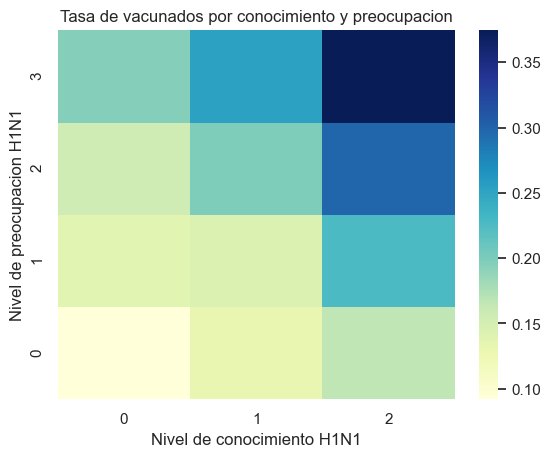

In [35]:
sns.heatmap(plotea,  cmap="YlGnBu", xticklabels = '012', yticklabels = '0123').invert_yaxis()
plt.title("Tasa de vacunados por conocimiento y preocupacion")
plt.xlabel("Nivel de conocimiento H1N1")
plt.ylabel("Nivel de preocupacion H1N1")
plt.show()

In [38]:
a_plotear['not_h1n1_vaccine'] = a_plotear['h1n1_vaccine'] ==0

In [39]:
plotea = a_plotear[["employment_status","h1n1_vaccine",'not_h1n1_vaccine']].groupby(['employment_status','h1n1_vaccine']).count()
plotea= plotea.reset_index()

## Barplot - Dataset: "Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines"

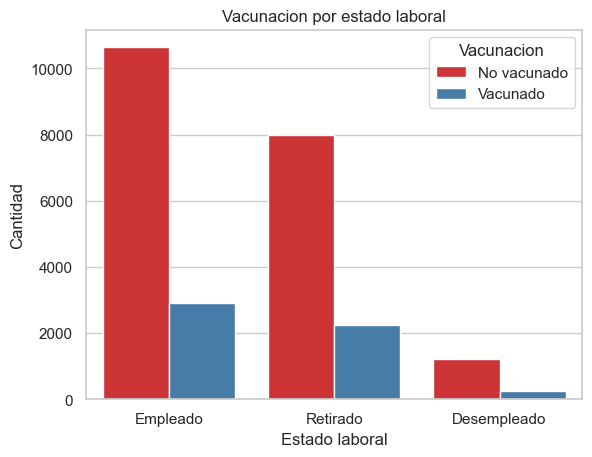

In [84]:
plotea.replace('Employed','Empleado',inplace = True)
plotea.replace('Not in Labor Force','Retirado',inplace = True)
plotea.replace('Unemployed','Desempleado',inplace = True)
plotea['h1n1_vaccine'].replace(0,'No vacunado',inplace = True)
plotea['h1n1_vaccine'].replace(1,'Vacunado',inplace = True)
sns.barplot(data = plotea, x = 'employment_status',y ='not_h1n1_vaccine', hue = 'h1n1_vaccine', palette = 'Set1')
plt.xlabel('Estado laboral')
plt.ylabel('Cantidad')
plt.legend(title = "Vacunacion")
plt.title("Vacunacion por estado laboral")
plt.show()

In [3]:
labels = pd.read_csv('dengue_labels_train.csv')
trainingdata = pd.read_csv('dengue_features_train.csv')

In [4]:
a_plotear = trainingdata.merge(labels, on=['city','year','weekofyear'] )

In [5]:
violin = a_plotear[['city', 'weekofyear','total_cases','year']].loc[(a_plotear['year']>2001) & (a_plotear['year']<2006)] 
violin.replace('sj', 'San Juan',inplace = True)
violin.replace('iq', 'Iquitos',inplace = True)

## Boxplot - Dataset: "DengAI: Predicting Disease Spread"

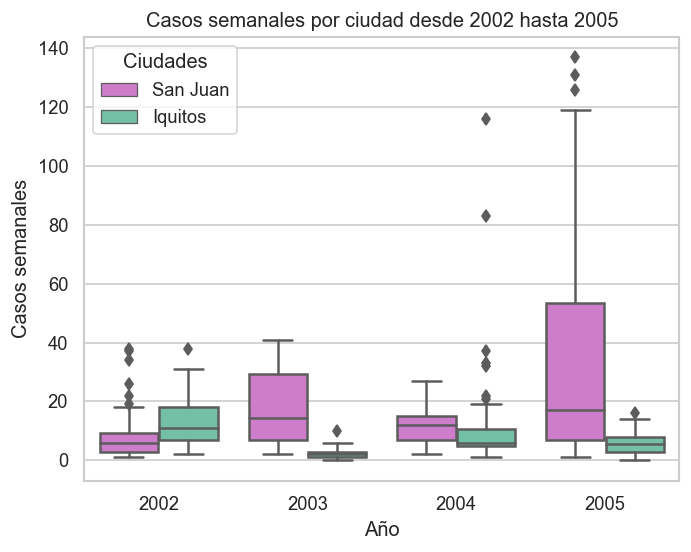

In [6]:
plt.figure(dpi = 120)
ax = sns.boxplot(x="year", y="total_cases", hue="city",
                 data=violin, palette = ['#da70d6','#66cdaa'])
plt.title('Casos semanales por ciudad desde 2002 hasta 2005')
plt.xlabel('Año')
plt.ylabel('Casos semanales')
plt.legend(title = "Ciudades")

plt.show()

In [7]:
box = a_plotear[['city', 'weekofyear','total_cases','reanalysis_sat_precip_amt_mm']].loc[(a_plotear['year']>2001) & (a_plotear['year']<2006)] 
box.replace('sj', 'San Juan',inplace = True)
box.replace('iq', 'Iquitos',inplace = True)
box['hasta_precipitacion_mm'] = box['reanalysis_sat_precip_amt_mm'].apply(lambda x: "25mm" if x < 25 else ("50mm" if x < 50 else ("75mm" if x < 75 else "+100mm")))

## Violinplot - Dataset: "DengAI: Predicting Disease Spread"

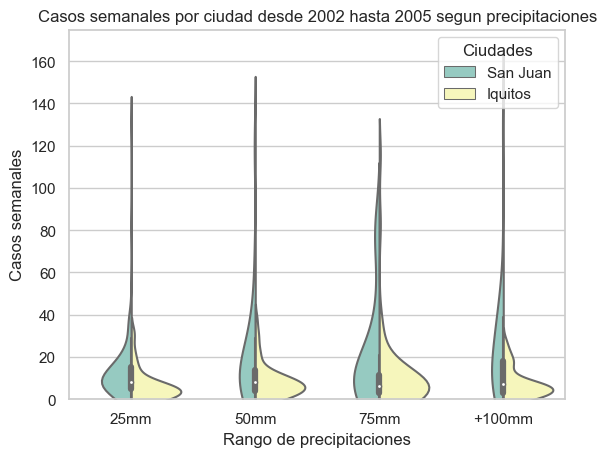

In [8]:
ax = sns.violinplot(x="hasta_precipitacion_mm", y="total_cases", hue="city",

                 data=box, palette="Set3", split=True)
plt.title('Casos semanales por ciudad desde 2002 hasta 2005 segun precipitaciones')
plt.xlabel('Rango de precipitaciones')
plt.ylabel('Casos semanales')
plt.ylim((0,175))
plt.legend(title = "Ciudades")
plt.show()

In [57]:
a_plotear = pd.read_csv('soja.csv')

In [58]:
a_plotear['Fecha'] =  pd.to_datetime(a_plotear['Fecha']).dt.year

In [59]:
bar = a_plotear.groupby('Fecha').mean().reset_index()

## Barplot - Dataset: "Proyectando el comportamiento de la soja"

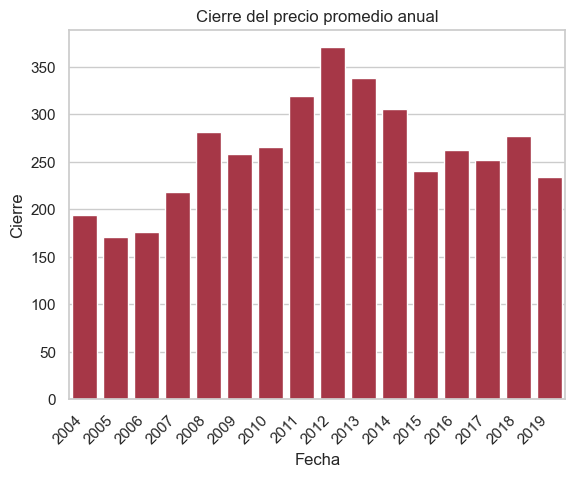

In [60]:
sns.barplot(x="Fecha", y="Cierre", data=bar,
                 color="#B8243A", )
plt.xticks(rotation=45, ha='right')
plt.title('Cierre del precio promedio anual')
plt.show()


## Histograma - Dataset: "Proyectando el comportamiento de la soja"

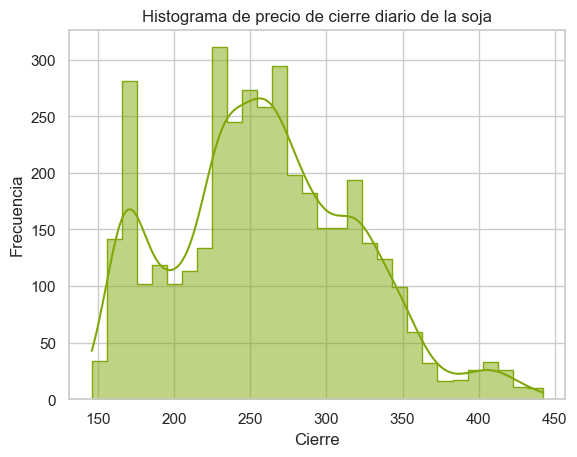

In [87]:
sns.histplot(data=a_plotear, x="Cierre", bins=30,kde=True , element="step", color ='#81a80a')
plt.ylabel('Frecuencia')
plt.title('Histograma de precio de cierre diario de la soja')
plt.show()

# Parte Dos: b)

El dataset lo saque de kaggle y es sobre distintos sensores de velocidad en NY, sus mediciones y ubicaciones.

In [9]:
a_plotear = pd.read_csv('may2016.csv')

In [10]:
ubicaciones = pd.read_csv('linkinfo.csv')

In [11]:
a_plotear

,Id,Speed,TravelTime,Status,DataAsOf,linkId
0,1,19.26,276,0,5/1/2016 03:00:43,4616337
1,2,24.85,130,0,5/1/2016 03:00:43,4616325
2,3,21.13,297,0,5/1/2016 03:00:43,4616324
3,4,13.05,235,0,5/1/2016 03:00:43,4616338
4,106,21.75,101,0,5/1/2016 03:00:43,4616323
...,...,...,...,...,...,...
1206181,405,21.75,79,0,5/31/2016 09:40:06,4362314
1206182,206,39.77,295,0,5/26/2016 17:17:25,4362252
1206183,205,45.98,314,0,5/26/2016 17:17:25,4362247
1206184,405,21.75,79,0,5/31/2016 09:40:06,4362314


In [12]:
a_plotear['DataAsOf'] = pd.to_datetime(a_plotear['DataAsOf'])

In [13]:
porBarrios = a_plotear.merge(ubicaciones , on = 'linkId')[['Speed','DataAsOf','Borough']]
manhattan = porBarrios.loc[porBarrios['Borough'] == 'Manhattan']
queens = porBarrios.loc[porBarrios['Borough'] == 'Queens']
statenIsland = porBarrios.loc[(porBarrios['Borough'] == 'Staten Island') | (porBarrios['Borough'] == 'Staten island')]

Decidi plotear en mi visualizacion original los dos distritos de la ciudad con casos de velocidades mas extremos durante la hora pico, Manhattan (27,330 hab/km²) y Staten Island (1,782 hab./km²). Abajo esta el boxplot de estos datos.

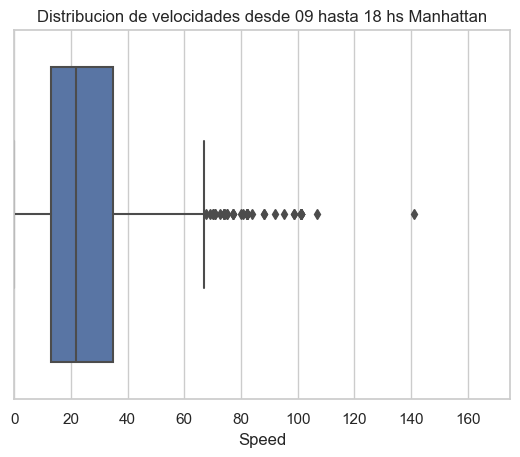

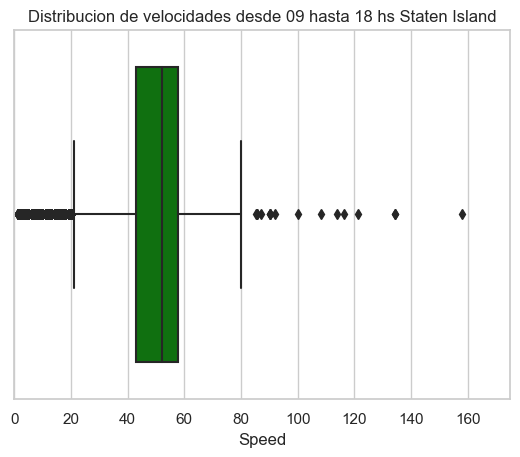

In [14]:
sns.boxplot(manhattan.loc[(manhattan['DataAsOf'].dt.hour < 18) & (manhattan['DataAsOf'].dt.hour >9)].Speed)
plt.title('Distribucion de velocidades desde 09 hasta 18 hs Manhattan')
plt.xlim((0,175))
plt.show()
sns.boxplot(statenIsland.loc[(statenIsland['DataAsOf'].dt.hour < 18) & (statenIsland['DataAsOf'].dt.hour >9)].Speed, color ='green')
plt.title('Distribucion de velocidades desde 09 hasta 18 hs Staten Island')
plt.xlim((0,175))
plt.show()

A partir de este boxplot cree mi propia visualizacion. Esta da la misma informacion que un boxplot pero con la forma de un velocimetro y sin outliers.

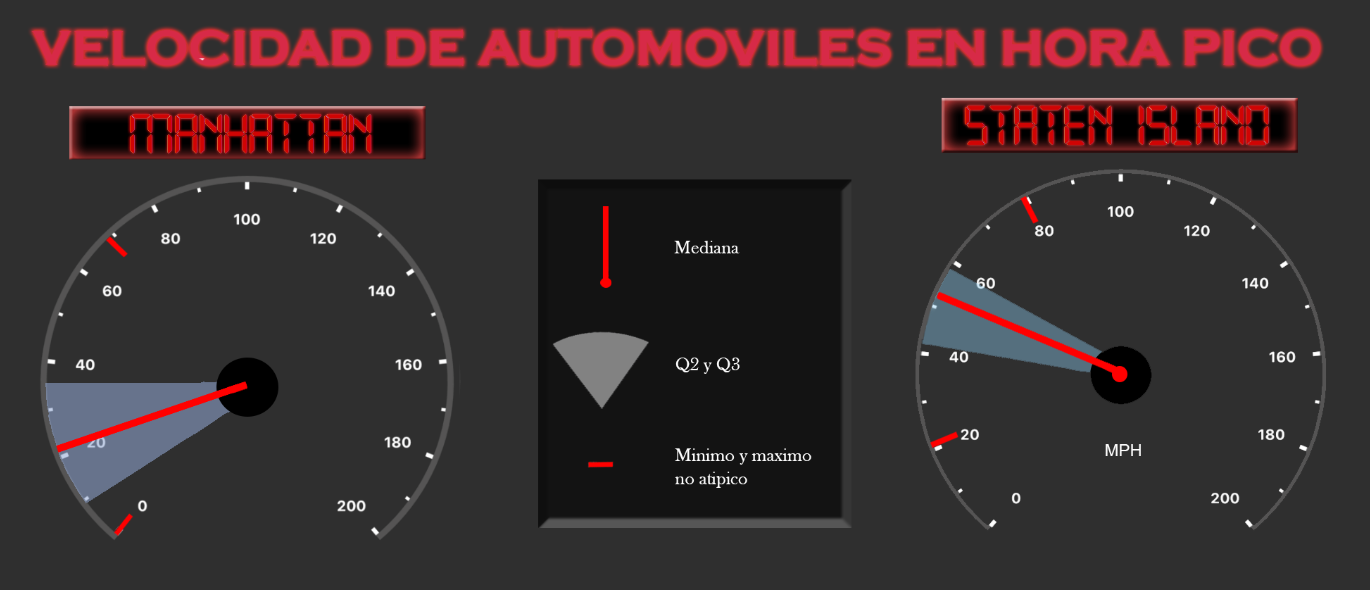

In [2]:
from IPython.display import Image
Image("velocidades.png")